In [9]:
import pandas as pd

data1 = pd.read_csv('../../raw/통합 테이블(공원)_2019.csv')
data2 = pd.read_csv('../../raw/지역사회건강조사 (전처리된 데이터)_2019/통합 테이블(건강)_2019.csv')
data2.rename(columns={'지역':'자치구'},inplace = True)
df2 = data2[data2['연령별'] == '계']
df2 = df2[df2['성별'] == '계']
df2.set_index('자치구',inplace = True)
data1.set_index('자치구',inplace = True)
df = pd.concat([df2,data1],axis=1)
df = df.drop(df.index[0])
df = df.drop(['연령별','성별'],axis=1)


<AxesSubplot:xlabel='자치구'>

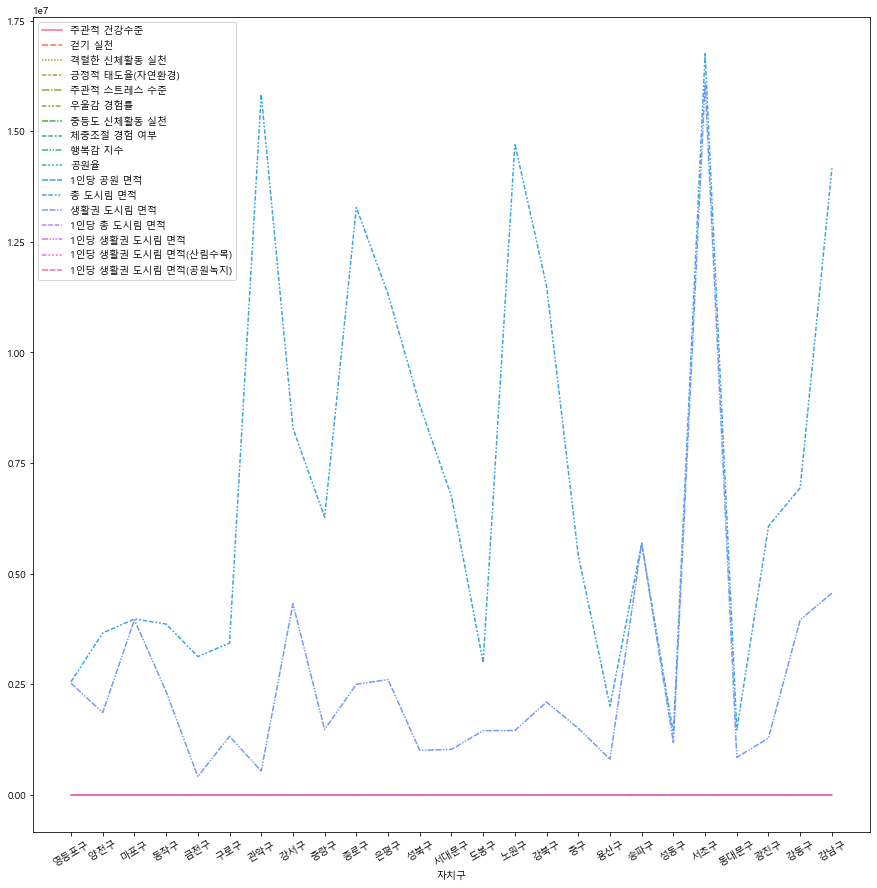

In [10]:
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns
fm = mp.font_manager.FontManager()

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.figure(figsize=(15,15))
plt.xticks(rotation=30)
sns.lineplot(data=df)

In [11]:
corr = df.corr()
corr

,주관적 건강수준,걷기 실천,격렬한 신체활동 실천,긍정적 태도율(자연환경),주관적 스트레스 수준,우울감 경험률,중등도 신체활동 실천,체중조절 경험 여부,행복감 지수,공원율,1인당 공원 면적,총 도시림 면적,생활권 도시림 면적,1인당 총 도시림 면적,1인당 생활권 도시림 면적,1인당 생활권 도시림 면적(산림수목),1인당 생활권 도시림 면적(공원녹지)
주관적 건강수준,1.000000,0.236629,0.519261,0.232622,-0.399326,-0.366303,0.307321,0.640303,0.702460,-0.413136,-0.247116,0.079927,0.628027,-0.072326,0.552591,0.463371,0.491799
걷기 실천,0.236629,1.000000,0.309262,-0.026364,-0.465611,-0.000070,0.433586,0.306272,0.190380,-0.344994,-0.515427,-0.303051,-0.059750,-0.502493,-0.207678,0.133097,-0.246896
격렬한 신체활동 실천,0.519261,0.309262,1.000000,0.042633,-0.266946,-0.262220,0.422556,0.120088,0.345276,-0.474283,-0.359855,-0.304171,0.087607,-0.159702,0.125024,0.237604,0.084450
긍정적 태도율(자연환경),0.232622,-0.026364,0.042633,1.000000,-0.408942,-0.366039,0.224297,-0.038514,0.081969,0.485136,0.424483,0.485126,0.156374,0.381530,0.181672,-0.279158,0.248851
주관적 스트레스 수준,-0.399326,-0.465611,-0.266946,-0.408942,1.000000,0.540710,-0.261465,-0.038934,-0.029027,0.069436,0.073175,0.096367,0.077292,0.038338,0.049085,-0.098940,0.071986
우울감 경험률,-0.366303,-0.000070,-0.262220,-0.366039,0.540710,1.000000,0.094432,0.134637,-0.100014,-0.050915,-0.277310,0.019981,0.008043,-0.373117,-0.200043,0.102097,-0.232546
중등도 신체활동 실천,0.307321,0.433586,0.422556,0.224297,-0.261465,0.094432,1.000000,0.296929,0.145373,-0.152974,-0.151447,0.139861,0.211632,-0.115614,0.100515,0.084798,0.089353
체중조절 경험 여부,0.640303,0.306272,0.120088,-0.038514,-0.038934,0.134637,0.296929,1.000000,0.659892,-0.431281,-0.334896,-0.033245,0.599374,-0.342771,0.400428,0.577023,0.307641
행복감 지수,0.702460,0.190380,0.345276,0.081969,-0.029027,-0.100014,0.145373,0.659892,1.000000,-0.339372,-0.233336,0.103725,0.446273,-0.092194,0.342430,0.371904,0.287635
공원율,-0.413136,-0.344994,-0.474283,0.485136,0.069436,-0.050915,-0.152974,-0.431281,-0.339372,1.000000,0.835403,0.556387,0.008952,0.610267,0.162269,-0.403916,0.253498


C:\Users\gimhu\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\gimhu\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


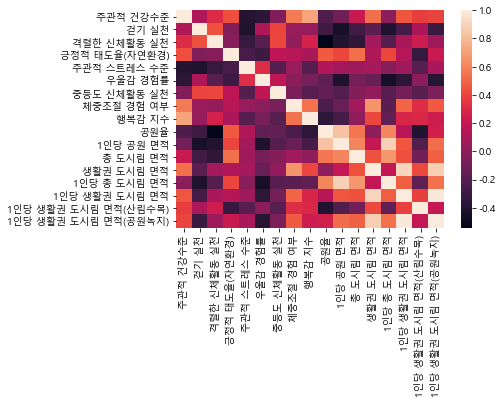

In [8]:
sns.heatmap(corr)
plt.rc('axes', unicode_minus=False)
plt.show()

In [6]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd
df1 = df[['행복감 지수','1인당 생활권 도시림 면적']]
df1.rename(columns={'행복감 지수':'행복감지수','1인당 생활권 도시림 면적':'_1인당생활권도시림면적'},inplace = True)

C:\Users\gimhu\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


<AxesSubplot:xlabel='행복감지수', ylabel='_1인당생활권도시림면적'>

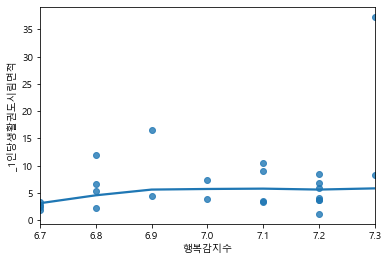

In [8]:
sns.regplot('행복감지수','_1인당생활권도시림면적', lowess=True, data = df1)

In [115]:
model = smf.ols(formula = '주관적건강수준 ~ _1인당생활권도시림면적', data = df1)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                주관적건강수준   R-squared:                       0.305
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     10.11
Date:                Wed, 14 Jul 2021   Prob (F-statistic):            0.00418
Time:                        15:41:12   Log-Likelihood:                -75.610
No. Observations:                  25   AIC:                             155.2
Df Residuals:                      23   BIC:                             157.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       36.0649      1.454     24.808      0.000      33.058      39.072
_1인당생활권도시림면적     0.4631      0.146      3.180      0.004       0.162       0.764
==============================================================================
Omnibus:                        0.264   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.876   Jarque-Bera (JB):                0.004
Skew:                           0.027   Prob(JB):                        0.998
Kurtosis:                       2.967   Cond. No.                         14.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

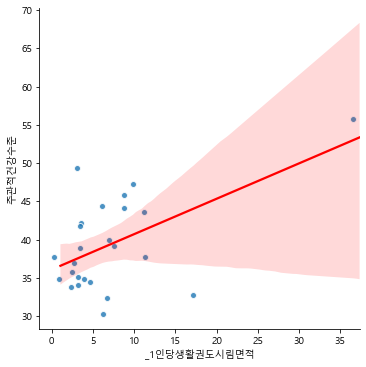

In [116]:
sns.lmplot(x="_1인당생활권도시림면적", y="주관적건강수준", data=df1, line_kws={'color':"red"}, scatter_kws={'edgecolor':"white"}, x_jitter=.9)